# Weeks 9 & 10 Exercises

## *Data Wrangling with Python* Activities

### Activity 9

In [4]:
import re
import pandas as pd
import requests
from bs4 import BeautifulSoup
import ssl

In [5]:
# check ssl certificate
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [9]:
# read HTML
top_url = "https://www.gutenberg.org/browse/scores/top"
response = requests.get(top_url)

In [10]:
# check status of request
def check_status(r):
    if r.status_code == 200:
        print("Success")
        return 1
    else:
        print("Failed")
        return -1

In [11]:
# check status
check_status(response)

Success


1

In [12]:
# decode response
contents = response.content.decode(response.encoding)

In [13]:
# soup it
soup = BeautifulSoup(contents, "html.parser")

In [22]:
# href list
href_lst = []

In [23]:
# find all href tags and store them in list of links
for link in soup.find_all("a"):
    href_lst.append(link.get("href"))

In [34]:
href_lst[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [26]:
book_ID = []

In [35]:
for i in range(45, 145):
    link = href_lst[i]
    link = link.strip()
    # regex find numeric digits
    n = re.findall("[0-9]+", link)
    if len(n) == 1:
        book_ID.append(int(n[0]))

In [38]:
# look at soup.text
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-10-31
last 7 days511052
last 30 days6183249



Top 100 EBooks yesterday
Top 

In [89]:
# lst titles
lst_titles = []

In [90]:
start_idx = soup.text.splitlines().index("A Room with a View by E. M.  Forster (12381)")

In [92]:
# add all 100 titles + info in list
for i in range(100):
    lst_titles.append(soup.text.splitlines()[start_idx + i])

In [93]:
# extract only the neame
lst_titles_final = []
for i in range(100):
    id1, id2 = re.match('^[a-zA-Z. ]*',lst_titles[i]).span()
    lst_titles_final.append(lst_titles[i][id1:id2])

In [94]:
# print titles
for title in lst_titles_final:
    print(title)

A Room with a View by E. M.  Forster 
Middlemarch by George Eliot 
Little Women
The Enchanted April by Elizabeth Von Arnim 
The Blue Castle
The Complete Works of William Shakespeare by William Shakespeare 
Moby Dick
The Adventures of Ferdinand Count Fathom 
Cranford by Elizabeth Cleghorn Gaskell 
The Expedition of Humphry Clinker by T.  Smollett 
The Adventures of Roderick Random by T.  Smollett 
History of Tom Jones
My Life 
Twenty Years After by Alexandre Dumas 
Frankenstein
Pride and Prejudice by Jane Austen 
The Legend of Sleepy Hollow by Washington Irving 
The Scarlet Letter by Nathaniel Hawthorne 
Dracula by Bram Stoker 
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Alice
The Yellow Wallpaper by Charlotte Perkins Gilman 
A Christmas Carol in Prose
The Picture of Dorian Gray by Oscar Wilde 
The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson 
A Doll
A Tale of Two Cities by Charles Dickens 
The Great Gatsby by F. Scott  Fitzgerald 
Noli Me Tangere by Jo

### Activity 10

In [107]:
import urllib.request, urllib.parse, urllib.error
import json
import os

In [103]:
# load api key
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [104]:
# create url and apikey addition
serviceurl = 'http://www.omdbapi.com/?'
apikey = "&apikey="+omdbapi

In [105]:
def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [108]:
def save_poster(json_data):
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [111]:
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [112]:
# test test
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=92f4a12e
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,164,233
imdbID: tt0120338
--------------------------------------------------


In [113]:
# test with error
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=92f4a12e
Error encountered:  Movie not found!


## Twitter API

In [116]:
import tweepy

In [122]:
client = tweepy.Client("AAAAAAAAAAAAAAAAAAAAAIEYjAEAAAAAmOZi0TfXlGgpdy01QpbCc3s7Ovc%3DKF1S3Sl1zuWAHjEUSmUnDP6WOWz9embGLhuswfvqnApphmG3ln")

In [127]:
# define my question as query
query = "Bellevue University"
# search recent tweets for my query
results1 = client.search_recent_tweets(query = query)
print(results1)

Response(data=[<Tweet id=1589430816379408386 text='RT @bremcmurtry08: Beyond blessed and excited to announce my commitment to Bellevue University!! So grateful for my family, coaches, and te…'>, <Tweet id=1589417443575074817 text='RT @bremcmurtry08: Beyond blessed and excited to announce my commitment to Bellevue University!! So grateful for my family, coaches, and te…'>, <Tweet id=1589410698484146176 text='RT @bremcmurtry08: Beyond blessed and excited to announce my commitment to Bellevue University!! So grateful for my family, coaches, and te…'>, <Tweet id=1589408298784235526 text='The all-around play of Bellevue University junior outside hitter Allie Kerns led the 16th-ranked Bruins volleyball team to a 3-1 (25-16, 22-25, 25-17, 25-15) upset victory over seventh-ranked Viterbo University https://t.co/R3FzdGrzwV'>, <Tweet id=1589408162884747269 text='RT @bremcmurtry08: Beyond blessed and excited to announce my commitment to Bellevue University!! So grateful for my family, coaches, an

## Visualization Practice

In [117]:
import matplotlib.pyplot as plt

In [129]:
candy = pd.read_excel("CANDYDATA.xlsx")
candy

C:\Users\Stewart\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,ITEM,JOY,DESPAIR,NET FEELIES,NET CLOUT,DESPAIR (NEG)
0,York Peppermint Patties,634,78,556.0,1.639118,-78.0
1,Whole Wheat anything,21,419,-398.0,1.012938,-419.0
2,White Bread,15,473,-458.0,1.123440,-473.0
3,Vicodin,323,210,113.0,1.227036,-210.0
4,Twix,770,26,744.0,1.832497,-26.0
...,...,...,...,...,...,...
82,Black Jacks,34,252,-218.0,0.658410,-252.0
83,Any full-sized candy bar,828,13,815.0,1.936093,-13.0
84,Anonymous brown globs that come in black and o...,120,663,-543.0,1.802569,-663.0
85,100 Grand Bar,570,34,536.0,1.390488,-34.0


<AxesSubplot:ylabel='Density'>

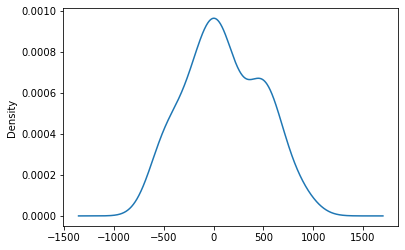

In [130]:
# density graph
candy["NET FEELIES"].plot.density()

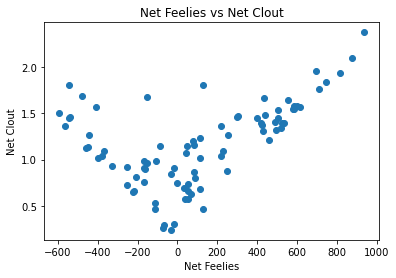

In [133]:
# scatterplot 
plt.scatter(candy["NET FEELIES"], candy["NET CLOUT"])
plt.xlabel("Net Feelies")
plt.ylabel("Net Clout")
plt.title("Net Feelies vs Net Clout")
plt.show()

In [136]:
candy2 = candy.dropna()

In [142]:
candy3 = candy2.sort_values("NET FEELIES")
candy3

,ITEM,JOY,DESPAIR,NET FEELIES,NET CLOUT,DESPAIR (NEG)
73,Candy that is clearly just the stuff given out...,29,621,-592.0,1.496386,-621.0
77,Broken glow stick,14,579,-565.0,1.365164,-579.0
84,Anonymous brown globs that come in black and o...,120,663,-543.0,1.802569,-663.0
67,Dental paraphenalia,43,586,-543.0,1.448041,-586.0
79,Box’o’ Raisins,47,585,-538.0,1.454947,-585.0
...,...,...,...,...,...,...
13,Snickers,739,27,712.0,1.763433,-27.0
4,Twix,770,26,744.0,1.832497,-26.0
83,Any full-sized candy bar,828,13,815.0,1.936093,-13.0
47,Kit Kat,894,15,879.0,2.092638,-15.0


In [143]:
candy3.head(10)

,ITEM,JOY,DESPAIR,NET FEELIES,NET CLOUT,DESPAIR (NEG)
73,Candy that is clearly just the stuff given out...,29,621,-592.0,1.496386,-621.0
77,Broken glow stick,14,579,-565.0,1.365164,-579.0
84,Anonymous brown globs that come in black and o...,120,663,-543.0,1.802569,-663.0
67,Dental paraphenalia,43,586,-543.0,1.448041,-586.0
79,Box’o’ Raisins,47,585,-538.0,1.454947,-585.0
69,Creepy Religious comics/Chick Tracts,126,607,-481.0,1.687463,-607.0
2,White Bread,15,473,-458.0,1.123440,-473.0
60,Gum from baseball cards,21,471,-450.0,1.132649,-471.0
49,Kale smoothie,51,497,-446.0,1.261568,-497.0
8,Those odd marshmallow circus peanut things,135,545,-410.0,1.565450,-545.0


Text(0.5, 1.0, 'Line Plot of Joy vs Despair')

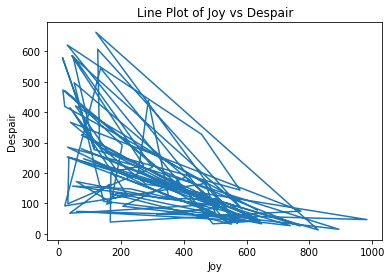

In [138]:
# line plot of joy vs despair
plt.plot(candy2["JOY"], candy2["DESPAIR"])
plt.xlabel("Joy")
plt.ylabel("Despair")
plt.title("Line Plot of Joy vs Despair")